In [28]:
## import hie. clustering lib
import scipy.cluster.hierarchy as sch ## for dendrogram and ploting
from sklearn.cluster import AgglomerativeClustering

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [29]:
airline = pd.read_csv('/content/EastWestAirlines.csv')

In [30]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
## before calculatimg the distances we neeed to do standardization

In [31]:
## customized / user defined normalization function
## here we can standardized functions as well from  sklearn but to show you how we can write custom function

def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return x                                            # (xi - min)/range (feature scaling ), range=max-min

In [32]:
## for our understanding
# (i-i.min())/(i-i.max()-i.max())
airline['Balance'].min() , airline['Balance'].max()

(0, 1704838)

In [33]:
(0-0)/(1704838-0)

0.0

In [34]:
## normalized dataframe

In [35]:
airline.iloc[:,1:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [36]:
## consider all row and from 1: col to all columns to normalize the values
df_norm = norm_func(airline.iloc[:,1:])

In [37]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [38]:
df_norm.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [39]:
df_norm.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


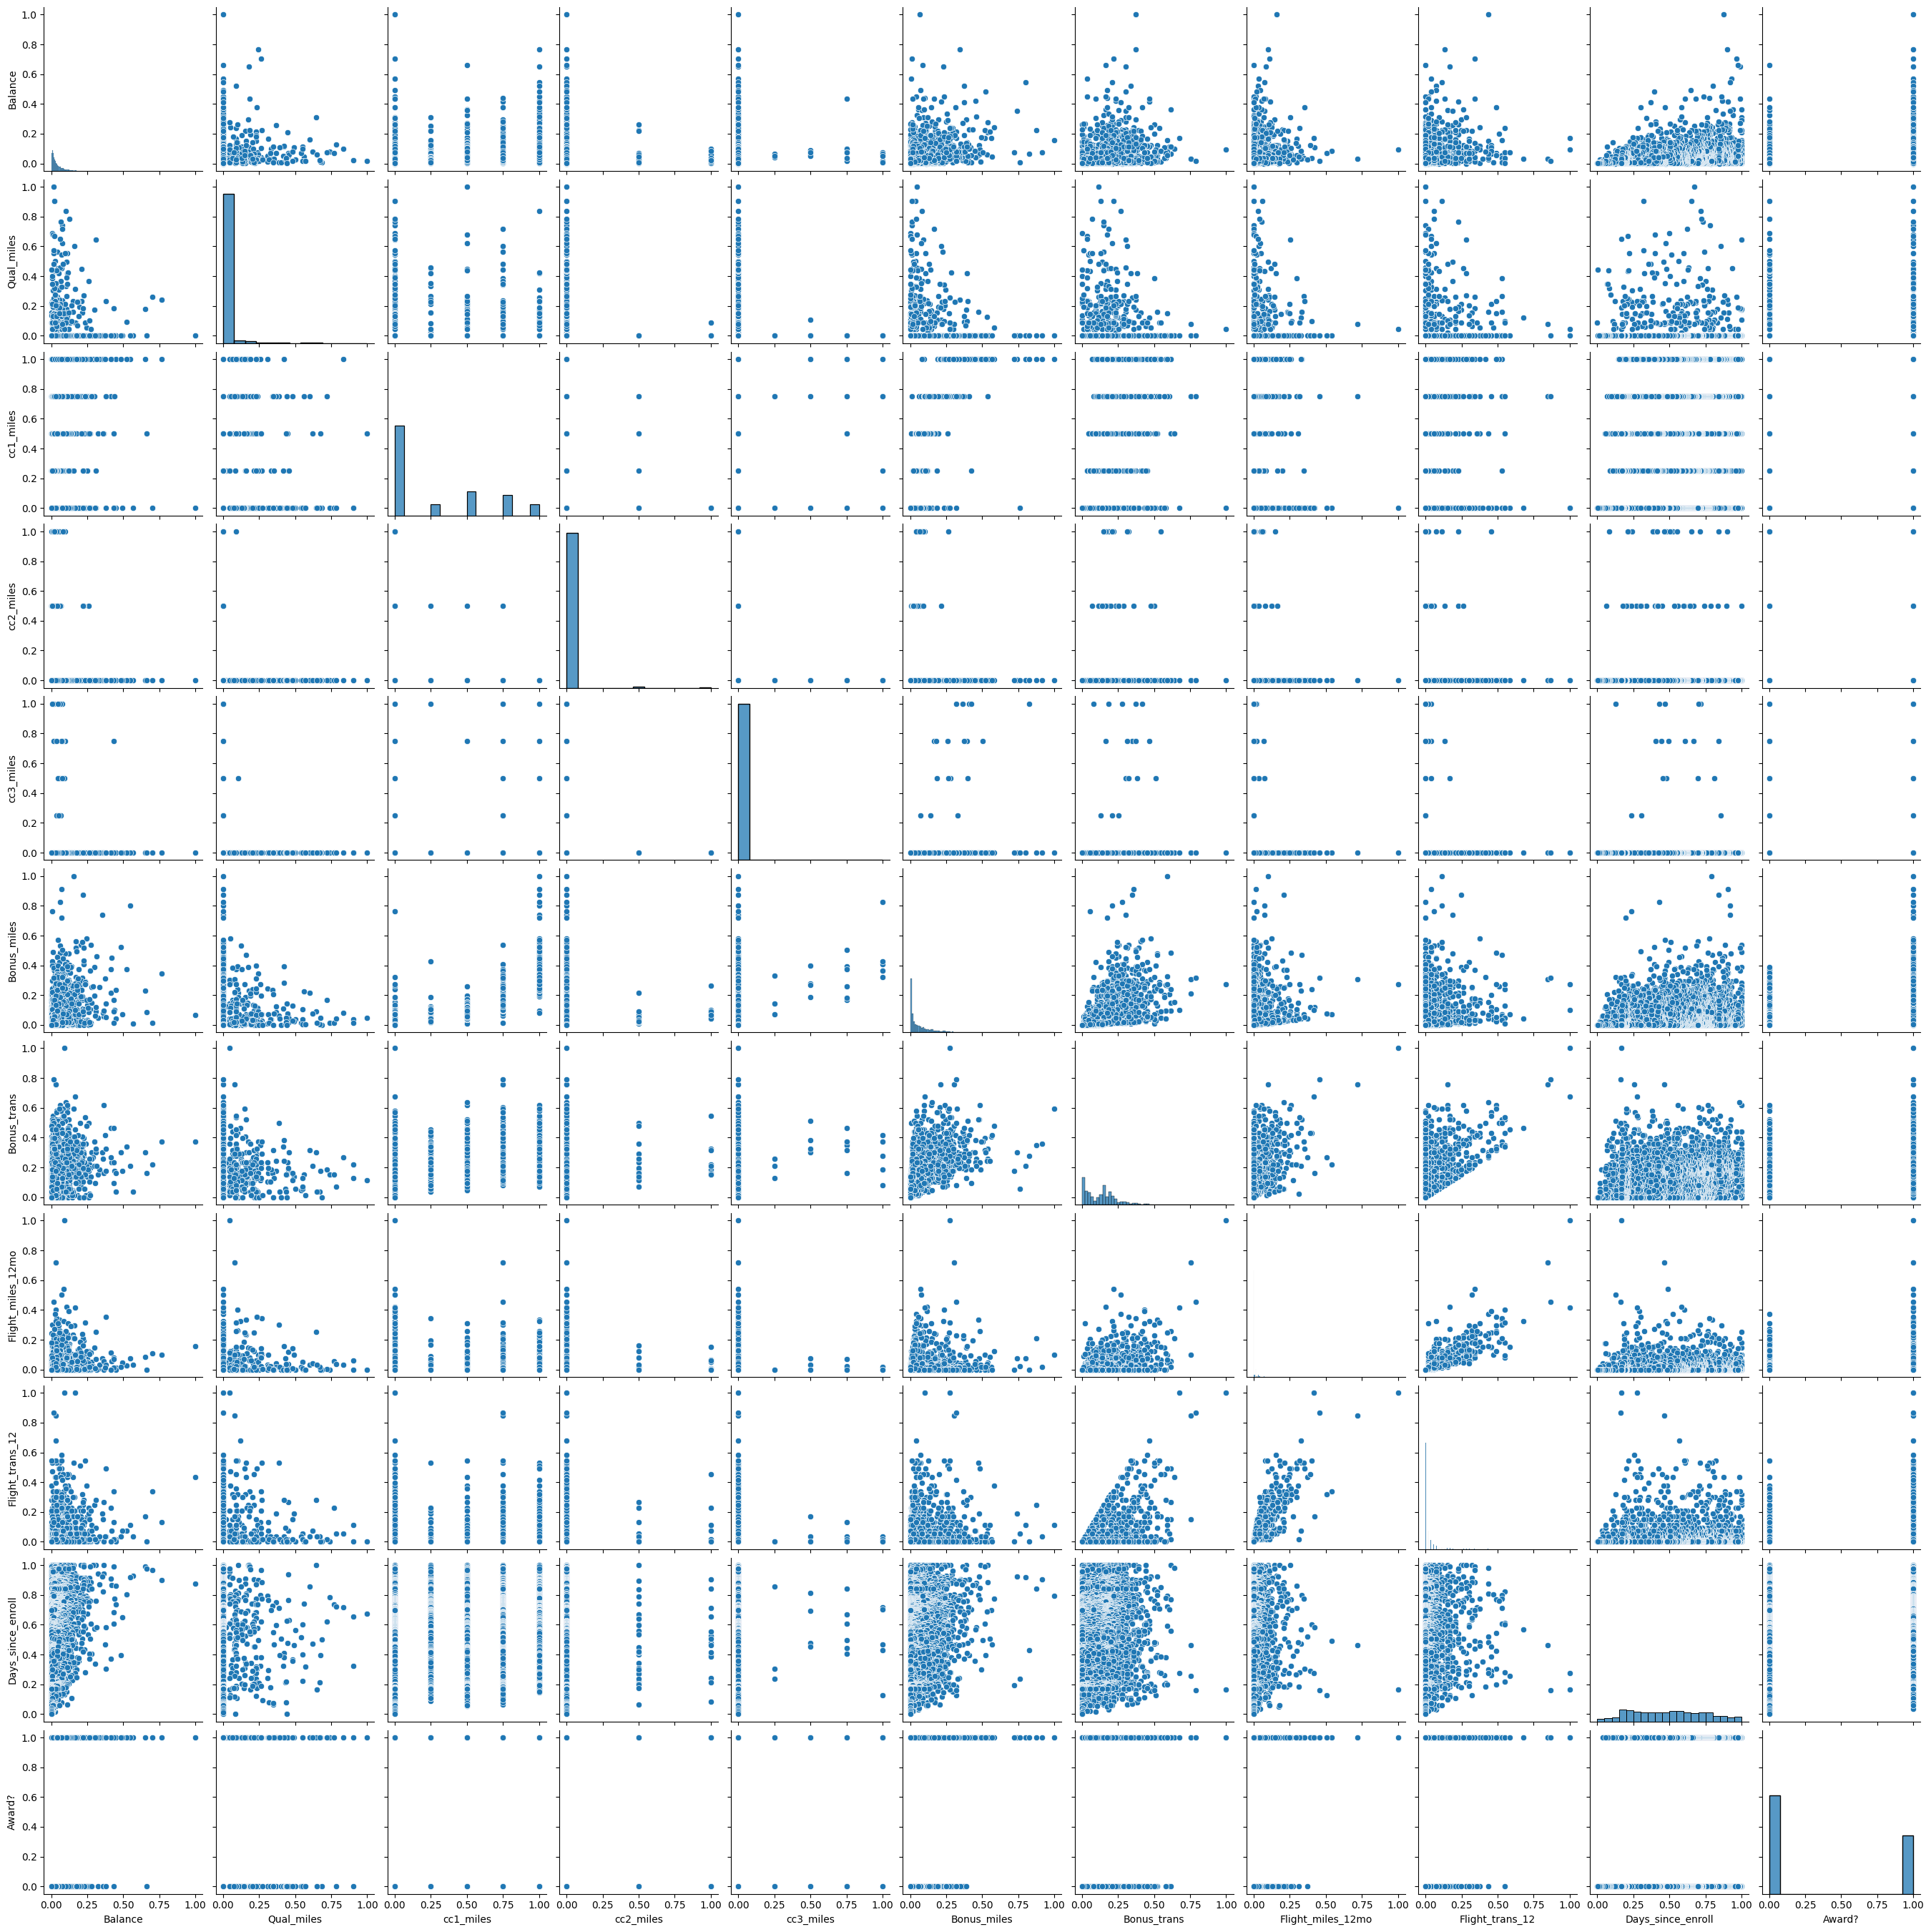

In [57]:
sn.pairplot(df_norm)
plt.show()

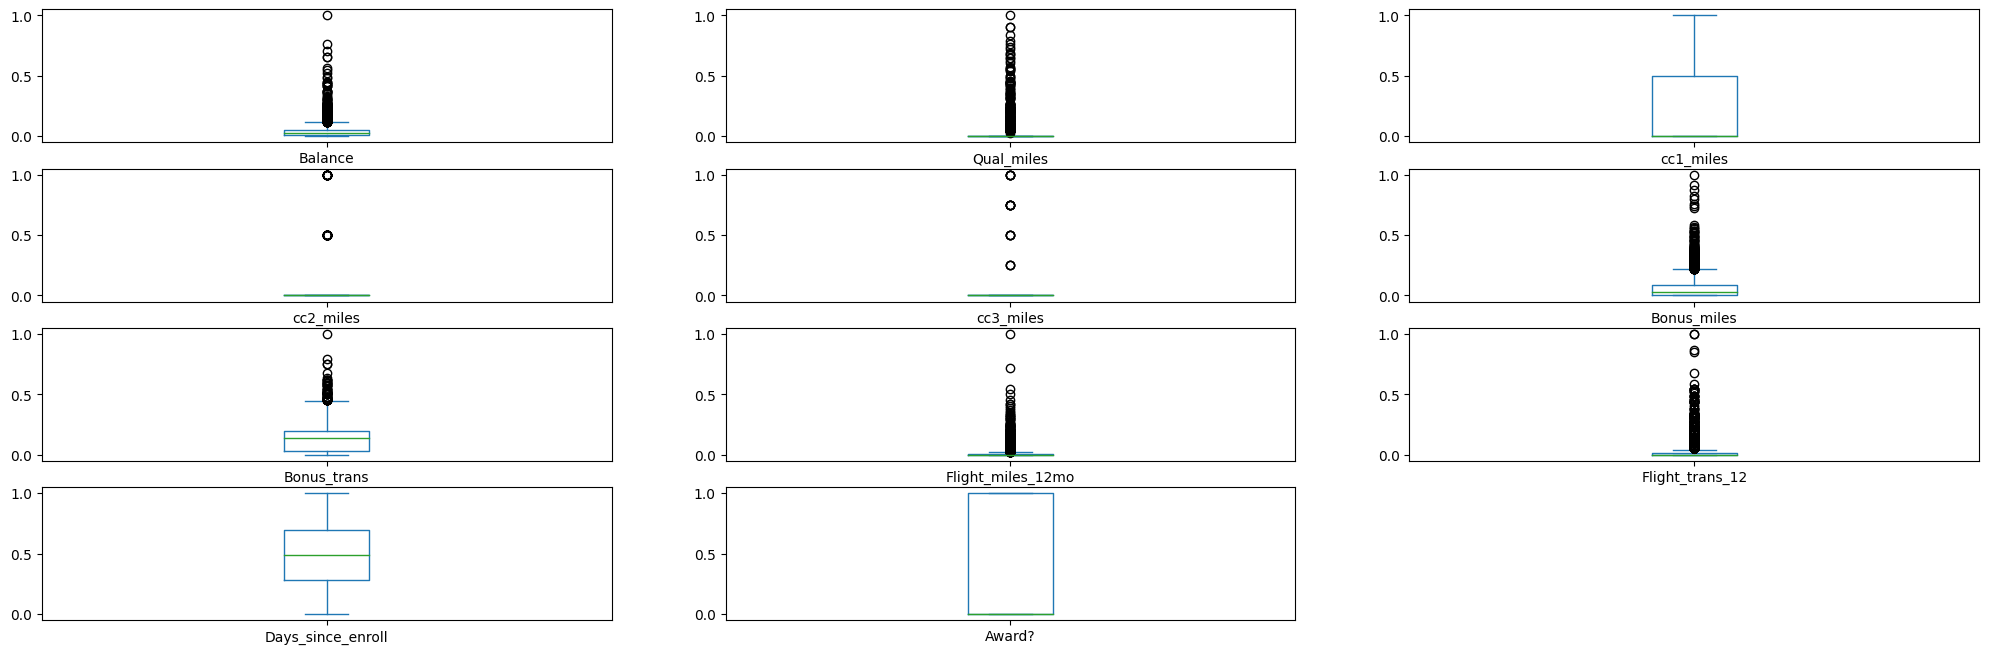

In [60]:
df_norm.plot(kind='box', subplots=True, layout=(5,3), figsize=(25,10))
plt.show()

In [40]:
df_norm.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


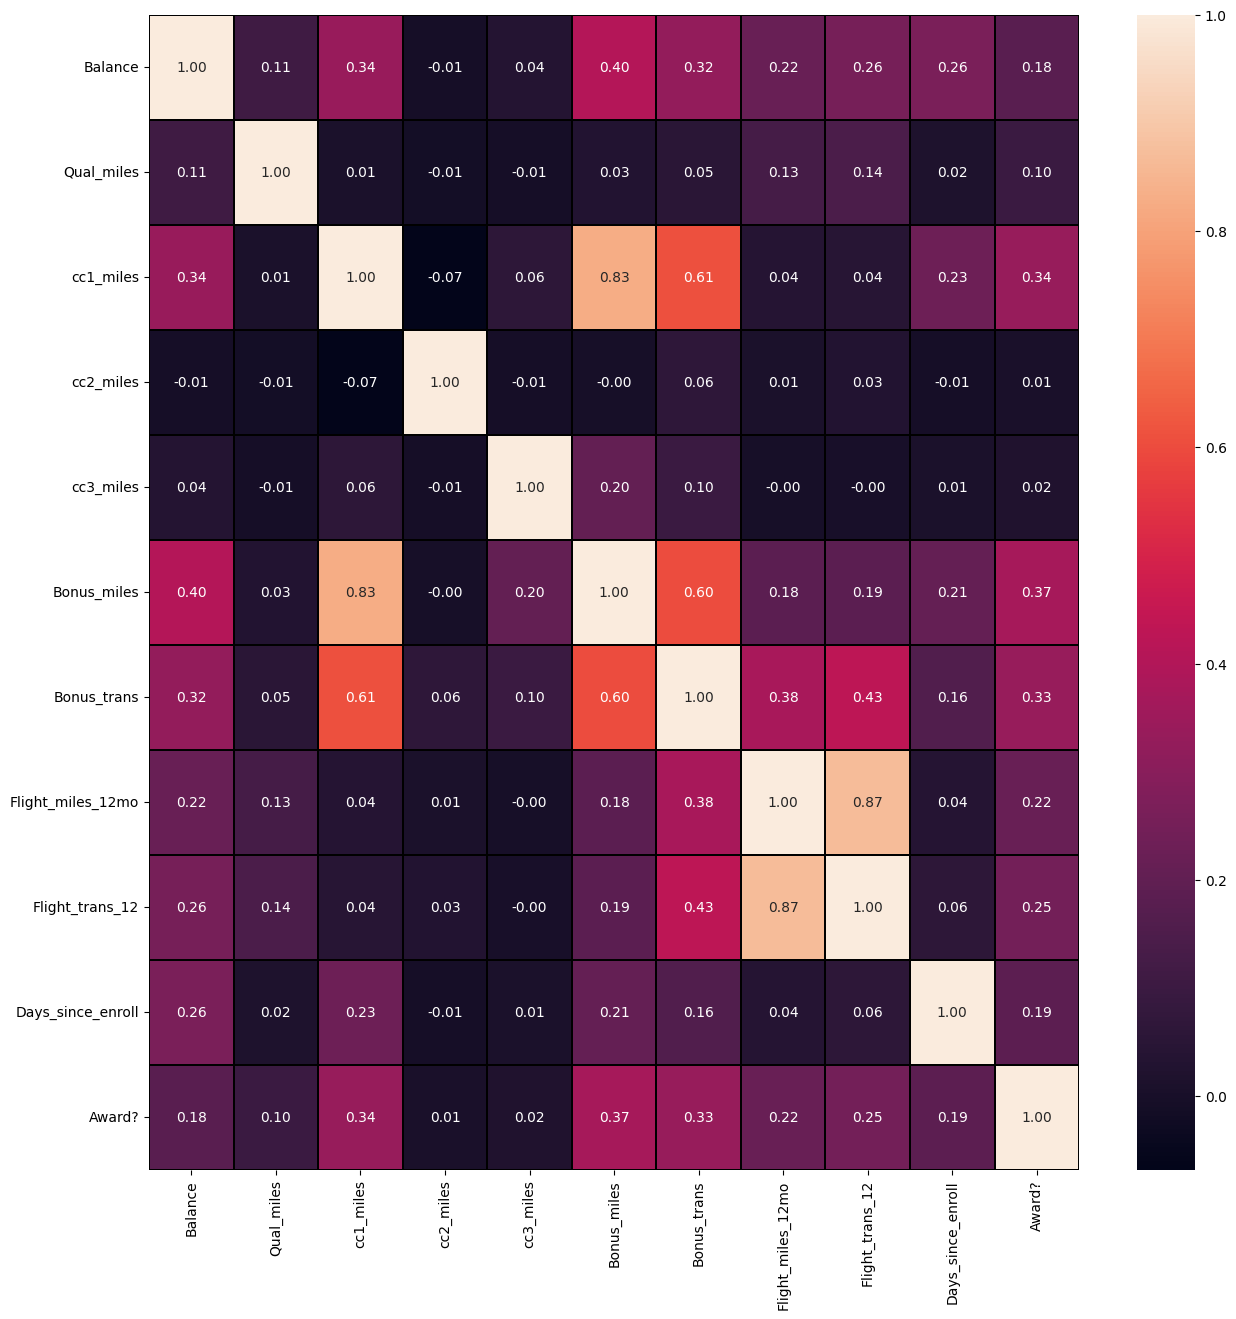

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_norm.corr(), annot=True, linewidths=0.2, linecolor="black", fmt=".2f", ax=ax)
plt.show()


<Figure size 7000x3500 with 0 Axes>

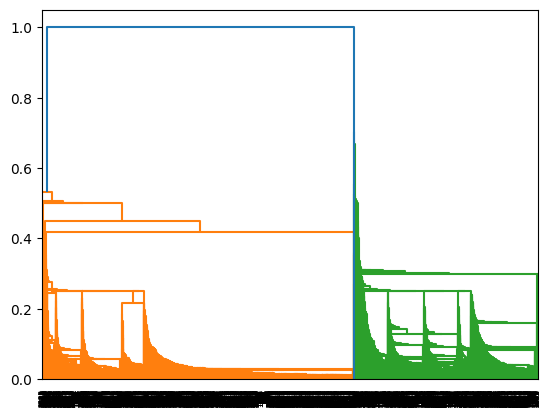

<Figure size 7000x3500 with 0 Axes>

In [42]:
## values get scale down then create dendrogram

dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'single'))   ##  here using single linkage method
plt.figure(figsize=(70, 35))

i have tried other methods of linkage

In [43]:
!pip install scipy

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage

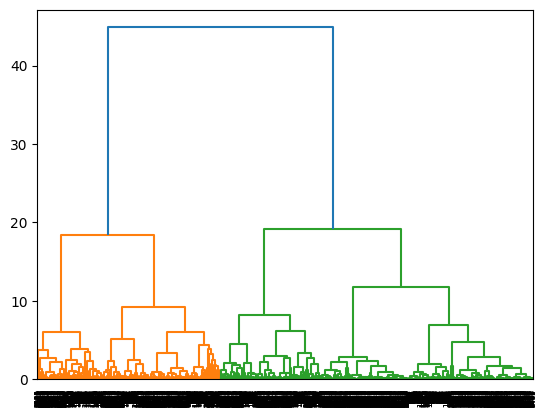

In [45]:
dendrogram = dendrogram(linkage(df_norm, method = 'ward'))

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [47]:
## for the complete linkage method i have concerted data in numpy array
df_array = df_norm.to_numpy()

In [48]:
linkage_matrix = linkage(df_array, method='complete')

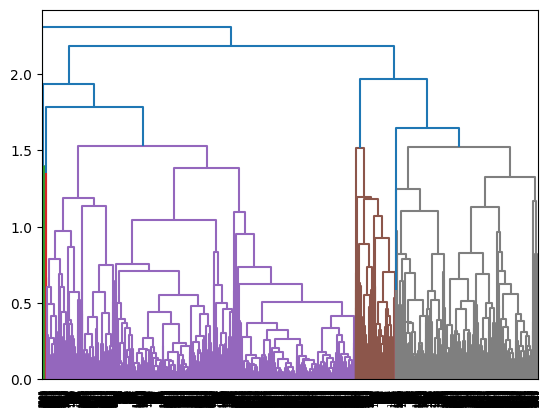

In [49]:
dendrogram1 = dendrogram(linkage_matrix)

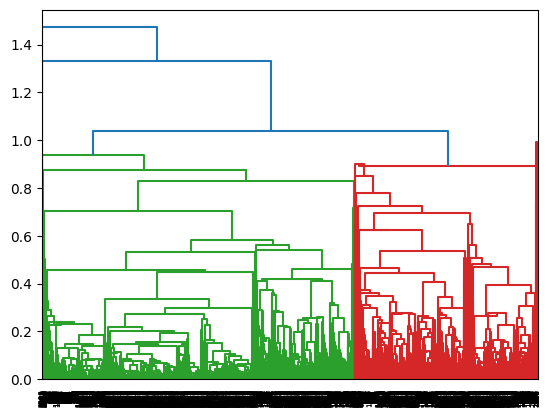

In [50]:
dendrogram2 = dendrogram(linkage(df_norm, method = 'centroid'))

## create cluster, dont have mentioned that how many clusters we have to make so i am going with 3 clusters

In [51]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage= 'single')

In [52]:
hc

AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=3)

In [53]:
## now i have created the clusters now i want to see the values are in which groups/clusters
## for that we are going to use fit predict method
y_hc = hc.fit_predict(df_norm)
clusters=pd.DataFrame(y_hc, columns=['clusters'])    ## append thses values in data frame


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [54]:
y_hc

array([1, 1, 1, ..., 0, 1, 1])

In [55]:
clusters  # points to clusters.

,clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [ ]:
airline['cluster_id'] = clusters

In [ ]:
airline     ## so we can see which customers belongs to which clusters

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [ ]:
airline_1 = airline.sort_values("cluster_id")

In [ ]:
cluster_sort = airline_1.iloc[:, [0,12]]

In [ ]:
cluster_sort

,ID#,cluster_id
1999,2016,0
1513,1528,0
1512,1527,0
3165,3187,0
3167,3189,0
...,...,...
1764,1780,1
1768,1784,1
1755,1771,1
3998,4021,1


In [ ]:
cluster_sort['cluster_id'].sort_values()

1999    0
427     0
469     0
471     0
472     0
       ..
3353    1
3574    1
3576    1
3794    1
3583    2
Name: cluster_id, Length: 3999, dtype: int64

In [ ]:
# how to count unique values
## the number of customers to which clusters
airline['cluster_id'].value_counts()


1    2518
0    1480
2       1
Name: cluster_id, dtype: int64

### K-means clustering

In [ ]:
## import some lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
## we dont know the no of clusters , so lets use k-means and elbow method to choose this number of optimal clusters
from sklearn.cluster import KMeans

In [ ]:
air_k = pd.read_csv("/content/EastWestAirlines.csv")

In [ ]:
air_k

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler    ## built in function for standardization

In [ ]:
## Normalizatio / standardization function

scaler = StandardScaler()  ## scaler is an object name of standardscaler class ## object intilizer


In [ ]:
tr_df = scaler.fit_transform(air_k.iloc[:, 1:])

In [ ]:
   ## fit transform is method of standard scaler class
tr_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
## how to find optimum number of culsters
## k-means algorithm aims to choose centroids that minimum the inertia or within cluster sum of squares intertia

In [ ]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

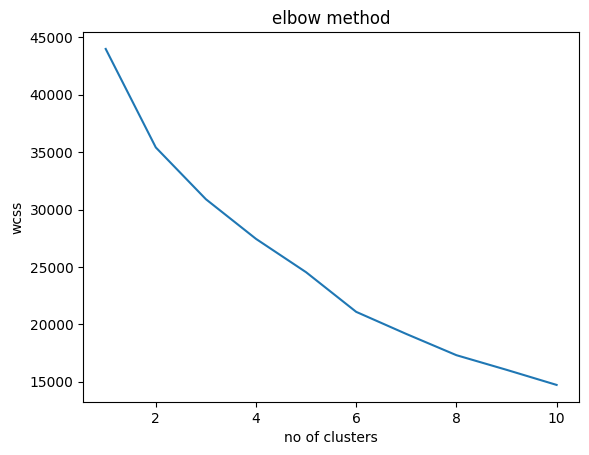

In [ ]:
import matplotlib.pyplot as plt

## inertia meansures the how well a data set was calculated by k-means
# it s calculated by measuring the distance between each data point and its centriod, squaring this distance
# and suming these squares across one cluster.
## a good model is one with low inertia and low number of clusters(k)

# to plot th eelbow method graph, we need to compute the WCSS (within cluster sum of squares)
# let say max no. of clusters could be 10
# as we are going to have 10 iterations we are going to write a for loop to create a list of 10 WCSS for the no of clusters.
wcss = []   ## whithin  the cluster sum of squares.intilize wcss and begin the loop

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i,init='k-means++', max_iter=300,random_state=0)  ## max ier 300 is default   ## inti = is random itilizer method
  kmeans.fit(tr_df)  ## use fit method to fit the kmeans object to our scaled data frame
  wcss.append(kmeans.inertia_) ## another name for wcss is inertia.in wcss list we will apend all distance ## this is like p and t value model.p-value

plt.plot(range(1,11), wcss)
plt.title('elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
wcss

[43989.000000000015,
 35409.511452424376,
 30899.24682465222,
 27446.372456681347,
 24541.329582045757,
 21089.973628929638,
 19165.86145865565,
 17316.866446128264,
 16043.406242309495,
 14726.983322766802]

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)  ## pass no of clusters as 4
predict = kmeans.fit_predict(tr_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
predict  ###

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
clusters_new = KMeans(n_clusters=3, random_state=0)
new_predict=clusters_new.fit_predict(tr_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters_new.labels_  ###

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
new_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
air_k['cluster_id'] = new_predict

In [ ]:
air_k.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [ ]:
## group by the cluster id
air_k.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2235.212262,44370.730307,96.720605,1.237097,1.019014,1.000388,4837.902212,7.015134,200.463718,0.625534,3707.357004,0.204501
1,1,1601.309221,117627.582671,157.884738,3.732114,1.002385,1.038156,40499.723370,18.991256,346.263911,1.025437,4883.024642,0.652623
2,2,1723.621951,195200.231707,783.207317,2.152439,1.036585,1.000000,31379.963415,26.993902,5412.000000,15.798780,4715.945122,0.810976


In [ ]:
air_k[air_k['cluster_id']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
air_k[air_k['cluster_id']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,1
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,1
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,1
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1


In [ ]:
air_k[air_k['cluster_id']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,2
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,2
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,2
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,2
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,2
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,2
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,2
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,2


In [ ]:
print(air_k[air_k['cluster_id']==0].shape[0])


2577


In [ ]:
print(air_k[air_k['cluster_id']==1].shape[1])


13


## DBSCAN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1 = pd.read_csv("/content/EastWestAirlines.csv")

In [ ]:
df = pd.read_csv("/content/EastWestAirlines.csv")

In [ ]:
df.head()
## cc1_miles and and bonus_trans these two columns will be our 1st prioriety

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
df.info() ## no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
df.isna()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,False,False,False,False,False,False,False,False,False,False,False,False
3995,False,False,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

<Axes: >

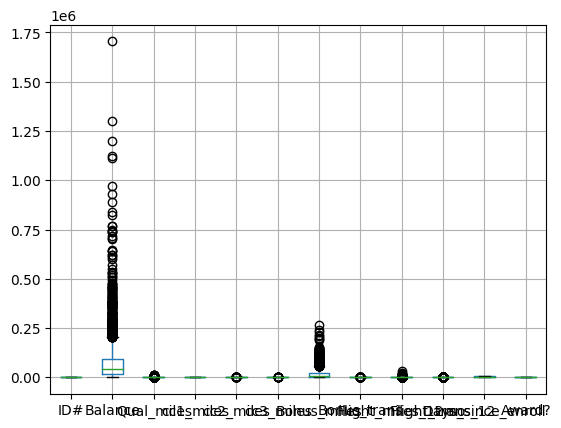

In [ ]:
## check for outliers
df.boxplot()

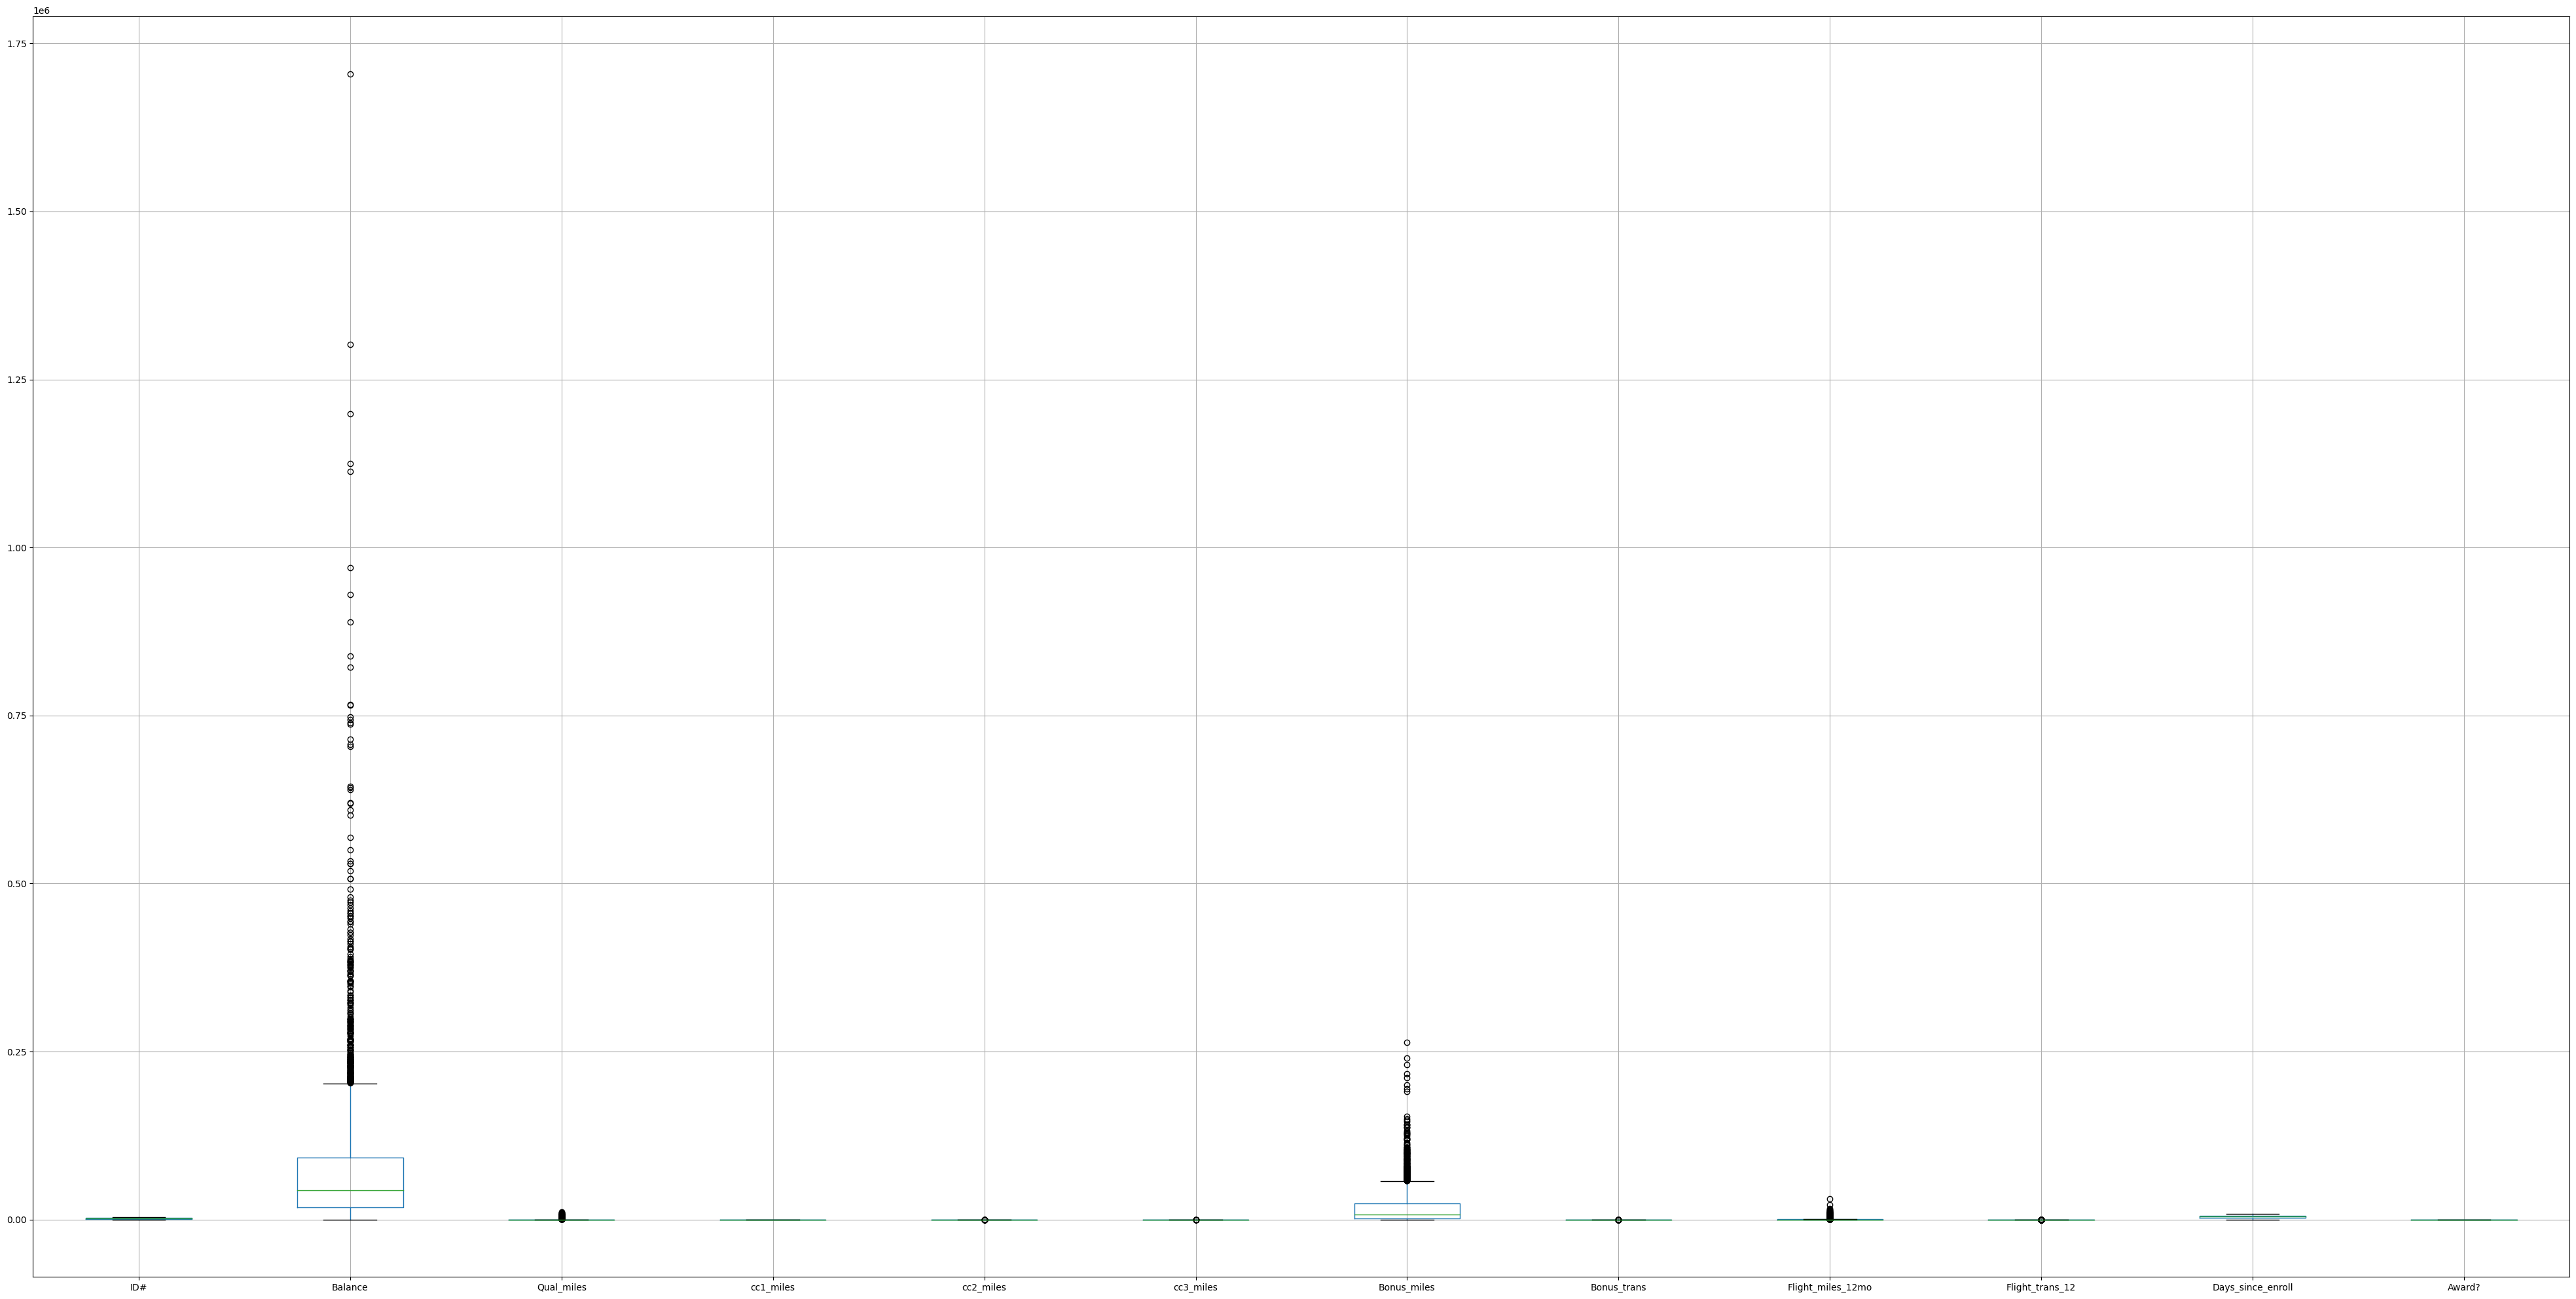

In [ ]:
plt.figure(figsize=(50, 25))
df.boxplot()
plt.show()
## huge amout of outliers are there

In [ ]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
!pip install sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
df = sc.fit_transform(df)
df

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
## build model
from sklearn.cluster import DBSCAN

In [ ]:
db1 = DBSCAN()   ## db1 is instance  # default eps=0.5 , min_samples = 5
see = db1.fit_predict(df)   ## we will get labels for clusters, -1 = outliers

In [ ]:
see

array([ 0,  0,  0, ..., -1,  0,  0])

In [ ]:
db2 = DBSCAN(eps=1, min_samples=3)  ## we are trying some values
db2.fit_predict(df)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
db3 = DBSCAN(eps=1, min_samples=7)  ## we are trying some values
db3.fit_predict(df)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
df = pd.DataFrame(df)

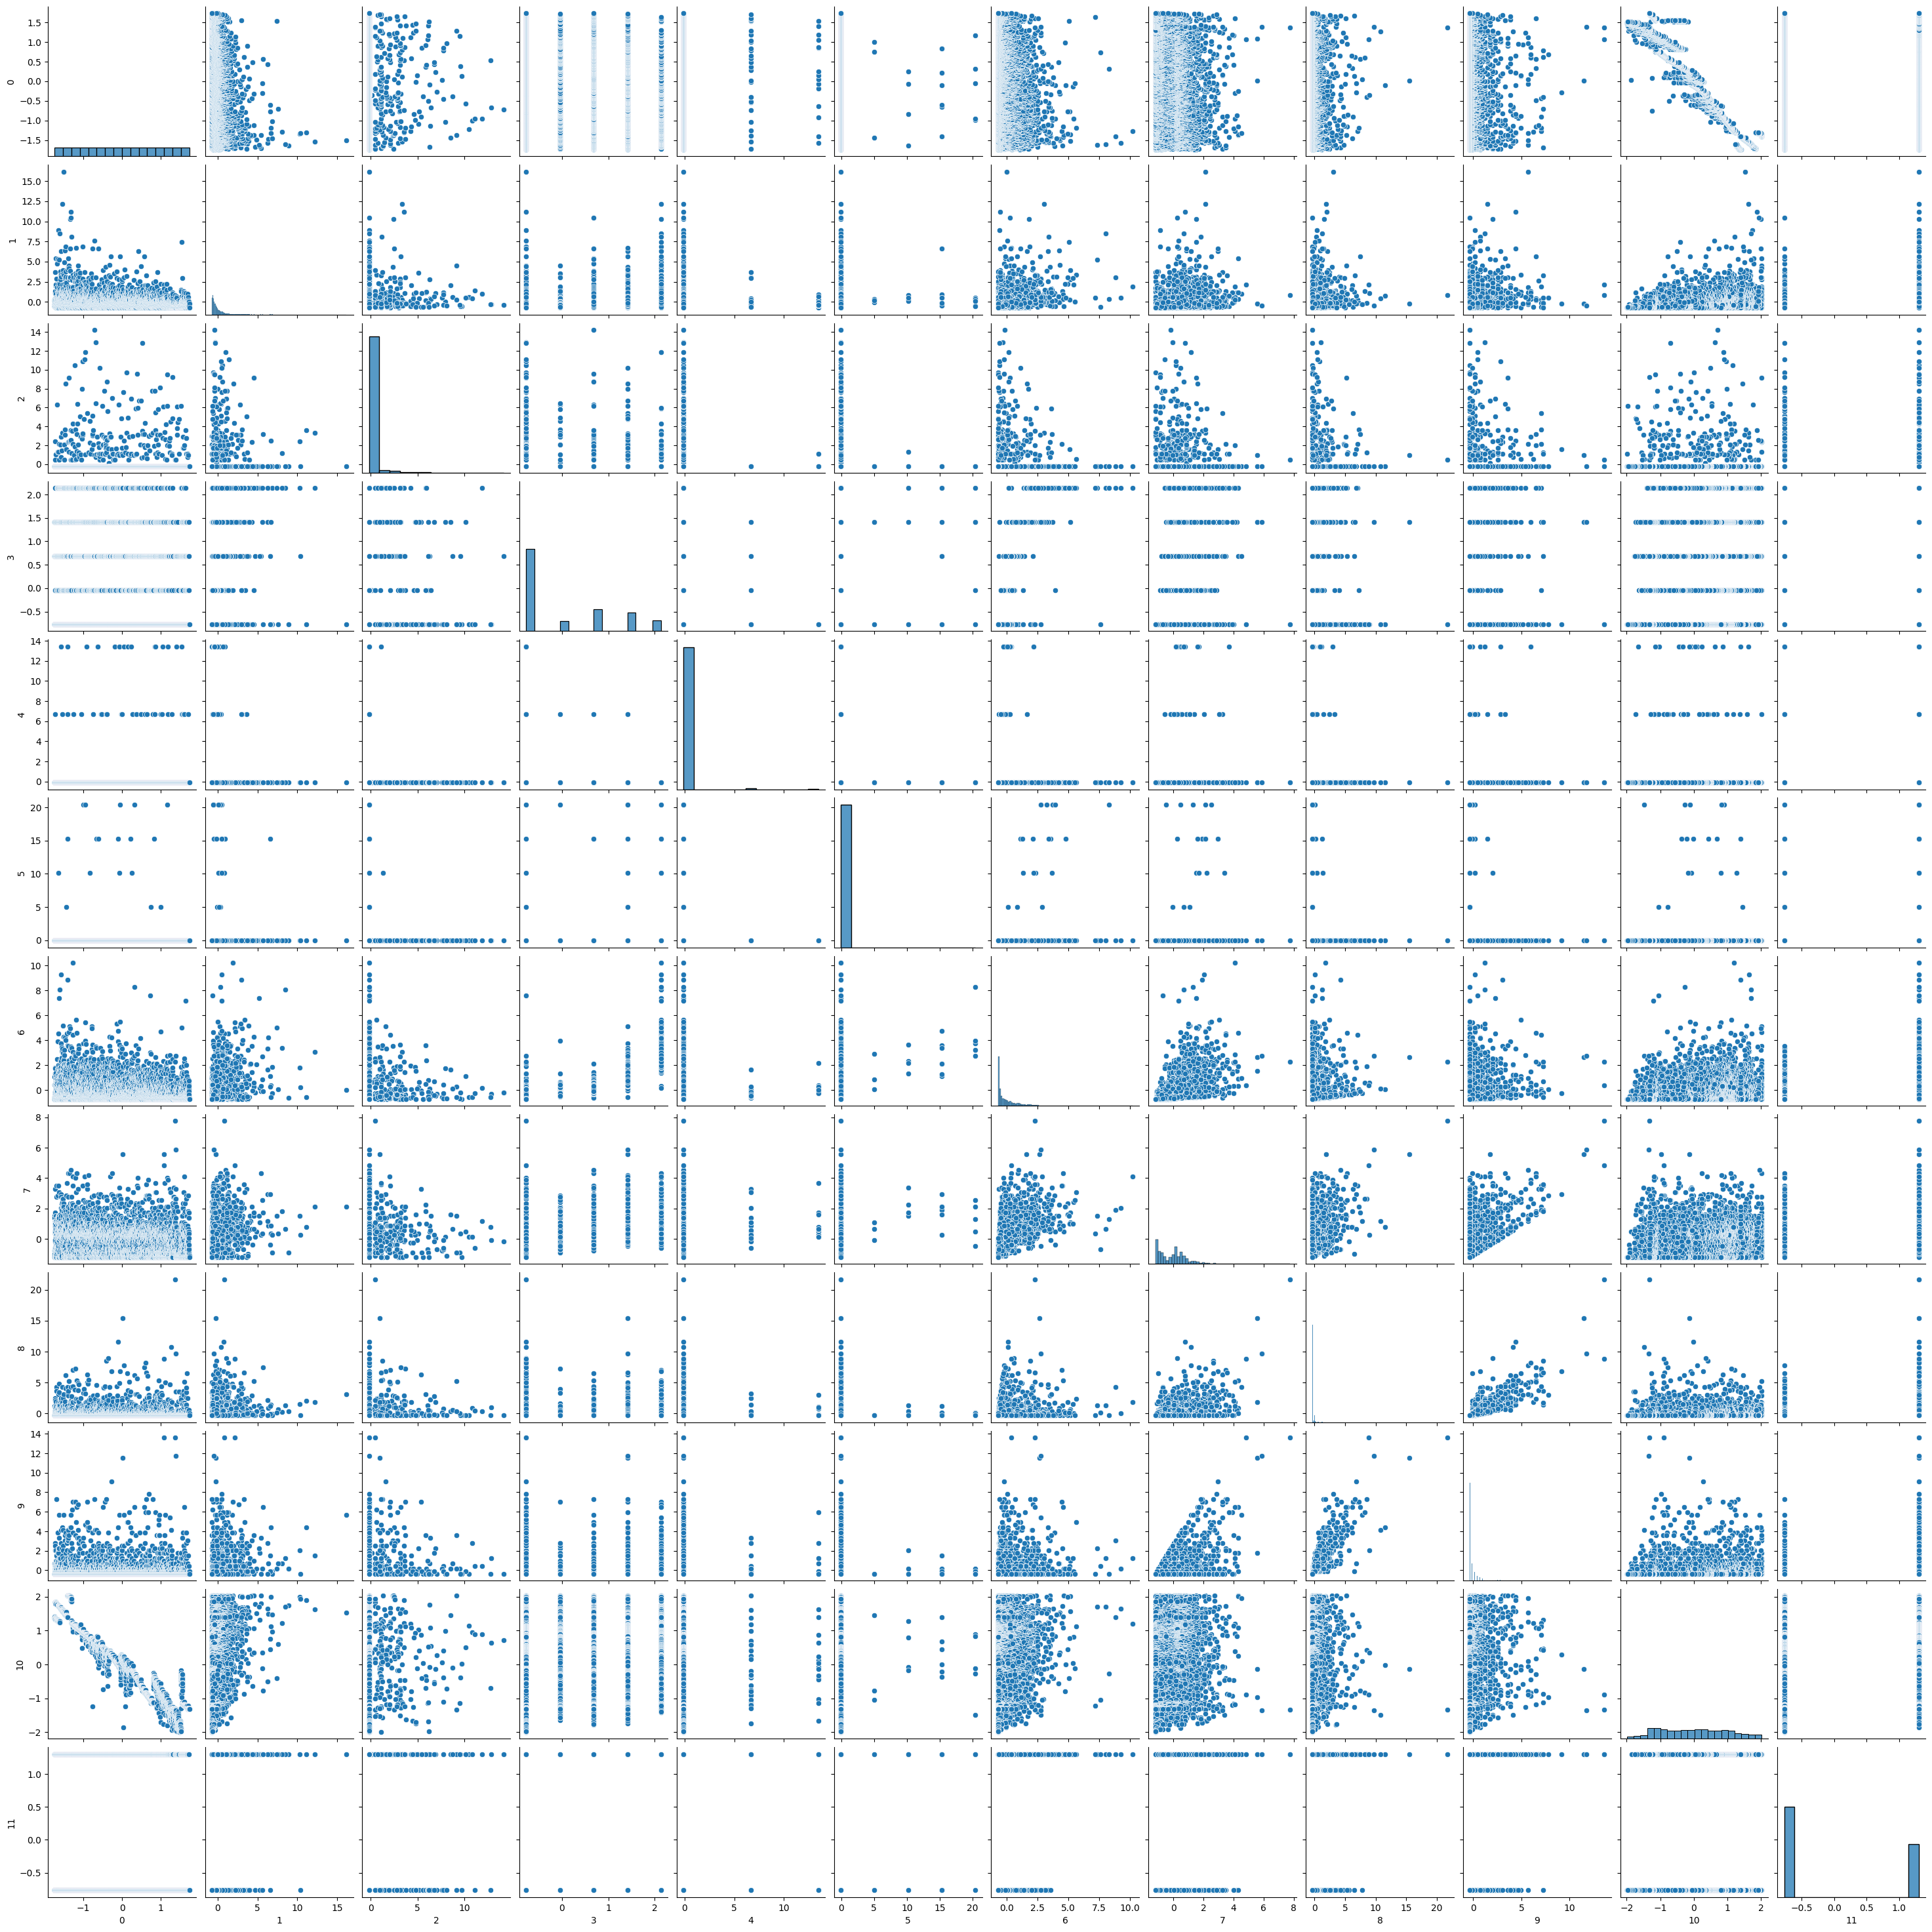

In [ ]:
sns.pairplot(df)  ## pair plot is scatter plot in seaborn scatter plot is pairplot

In [ ]:
!pip show sklearn

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
## which method to go for it
## for it we are having evaluavtion method silhoutte score
from sklearn.metrics import silhouette_score

## range between -1 to +1

In [ ]:
## evaluvate your model with silhoutte score
silhouette_score(df,db1.fit_predict(df) )

-0.2823258834687895

In [ ]:
silhouette_score(df,db2.fit_predict(df) )

-0.09419298831512762

In [ ]:
silhouette_score(df,db3.fit_predict(df) )

0.12291856395071173

In [ ]:
db4 = DBSCAN(eps=2, min_samples=7)  ## we are trying some values
db4.fit_predict(df)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
silhouette_score(df,db4.fit_predict(df) )

0.22394010047748522

In [ ]:
db5 = DBSCAN(eps=3, min_samples=8)  ## we are trying some values
y = db5.fit_predict(df)

In [ ]:
silhouette_score(df,db5.fit_predict(df) )      ### this is the so far best value i get *********

0.5147450974702379

In [ ]:
db6 = DBSCAN(eps=4, min_samples=9)
db6.fit_predict(df)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
silhouette_score(df,db6.fit_predict(df) )

0.5120545234183888

In [ ]:
db7 = DBSCAN(eps=3, min_samples=12)
db7.fit_predict(df)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
silhouette_score(df,db7.fit_predict(df) )

0.5114910635860678

In [ ]:
df1['cluster'] = y

In [ ]:
df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
##  extract outliers
df1[df1['cluster'] == -1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,-1
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,-1
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,-1
126,129,602064,0,5,1,1,194753,26,2250,10,7652,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,-1
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1,-1
3788,3811,374613,0,1,2,1,23592,31,5000,14,3463,1,-1
3846,3869,97510,1678,5,1,1,71609,51,7650,26,1665,1,-1


In [ ]:
df1[df1['cluster'] == 0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
df1['cluster'].

3999

In [ ]:
df1['cluster'].nunique()

4

In [ ]:
unique_count = df1['cluster'].nunique()

print(f"Number of unique values in the 'cluster' column: {unique_count}")

Number of unique values in the 'cluster' column: 4


In [ ]:
df1.groupby('cluster').agg('mean')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,,
-1,1517.353659,299472.000000,1907.231707,2.975610,1.085366,1.597561,66717.390244,29.292683,4420.682927,12.280488,5109.634146,0.829268
0,2022.389533,69155.715133,108.254963,2.049755,1.000000,1.000000,16138.525651,11.192060,378.310647,1.148234,4100.235628,0.361176
1,2400.600000,39187.040000,0.000000,1.120000,2.000000,1.000000,11107.040000,14.840000,224.000000,0.800000,3703.240000,0.320000
2,2152.000000,41562.307692,0.000000,1.000000,3.000000,1.000000,16338.230769,16.076923,323.076923,0.923077,4133.384615,0.307692
